# K-vecinos más cercanos (KNN)

El algoritmo de k-vecinos más cercanos (K-nearest neighbors), generalmente conocido como KNN, es un modelo usado tanto para problemas de regresión como para problemas de clasificación.
La regresión usando KNN se basa en una suposición: los predictores X que están cerca deberían dar predicciones que también están cerca.

El principio de los modelos de KNN es el de encontrar las k muestras de entrenamiento más cercanas en distancia a la muestra de la que se pretende predecir la variable dependiente. A partir de las variables dependientes de esos “k vecinos”, se estima la variable dependiente de la muestra en cuestión. Es decir, el objetivo primero es obtener los k vecinos de la muestra n de la que solo se dispone de las variables independientes Xn=(X1, X2, …, Xp). Con esos k vecinos se puede predecir Y a partir de las Y1, Y2, …, Yk de sus k vecinos. Una explicación visual se puede ver en la figura 4.

El modelo KNN es un **modelo no lineal**. Por lo tanto, a diferencia de la regresión lineal, es capaz de captar relaciones no lineales entre las variables independientes y la dependiente.

In [2]:
# Librerias
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

Generemos un juego de datos aleatorios.

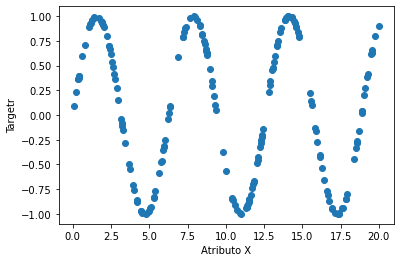

In [4]:
np.random.seed(0)
X = np.sort(20 * np.random.rand(200,1), axis = 0)
y = np.sin(X)[:, 0]
y_ruido = np.sin(X)[:,0] + np.random.normal(size = X.shape[0], scale = 0.20)

plt.xlabel("Atributo X")
plt.ylabel("Targetr")
plt.scatter(X,y.ravel())
plt.show()

Esta curva se puede dar con ruido también (una curva SENO no ta obvia).

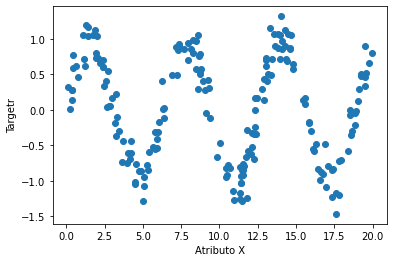

In [5]:
plt.xlabel("Atributo X")
plt.ylabel("Targetr")
plt.scatter(X,y_ruido.ravel())
plt.show()

Se añade ruido para hacer los datos con una forma más realista. Se ajusta el modelo KNN optimizando el parámetro `n_neighbors (k)` por medio de validación cruzada (unidad I) y se representan las predicciones.

In [8]:
clf = KNeighborsRegressor()
params = {"n_neighbors": range(1,20)}
clf_gs = GridSearchCV(clf, params, cv=3)
clf_gs.fit(X, y_ruido)
print('El mejor estimador es: {}'.format(clf_gs.best_estimator_))

El mejor estimador es: KNeighborsRegressor(n_neighbors=2)


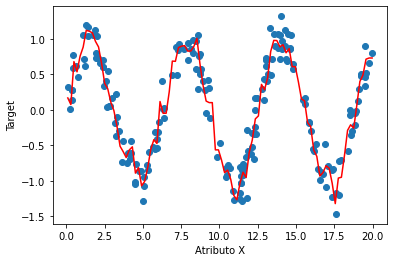

In [9]:
# Plot
X_axis = np.linspace(X.min(), X.max(), 100). reshape(100,1)
y_axis_pred = clf_gs.best_estimator_.predict(X_axis)

plt.xlabel("Atributo X")
plt.ylabel("Target")
plt.scatter(X, y_ruido.ravel())
plt.plot(X_axis, y_axis_pred, c="red")
plt.show()

En la se muestran los datos originales y, en rojo, la función estimada por medio de un KNN. La función estimada, a diferencia de la regresión lineal, tiene una forma no lineal. Es decir, la función estimada no es una línea recta. De hecho, en este ejemplo realiza subidas y bajadas. Si se hubiese hecho uso de una regresión lineal en este caso, la función sería una línea recta horizontal en el 0. Esto daría unos errores mucho mayores a esta nueva función, ya que, al ser datos no lineales, el modelo necesariamente que aplicar debe ser no lineal.  